In [ ]:
pip install statsmodels

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

In [86]:
df = pd.read_csv(r"C:\Users\GASTO\Downloads\Compressed\train.csv\train.csv")

In [87]:
df

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,539.0,25.0,0.50,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.498716,0.442789,35.697203,5830.89362
1,1,691.0,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.502842,0.443755,35.285926,6190.66597
2,2,775.0,25.0,0.50,0.38,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.385022,0.399556,30.052521,3923.90628
3,3,49.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.346411,0.388819,29.631796,3680.56025
4,4,556.0,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.403311,0.401670,30.806856,4576.10071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,714.0,25.0,0.50,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.509934,0.427938,35.874495,6422.92209
14996,14996,726.0,25.0,0.50,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.508342,0.459224,37.966864,6263.80788
14997,14997,145.0,12.5,0.25,0.25,0.38,0.38,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.483671,0.417909,35.557537,6521.29112
14998,14998,28.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.372318,0.395636,30.795613,4278.76321


In [88]:
df=df.set_index('id')


In [89]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [48]:
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,,
0,539.0,25.0,0.50,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.498716,0.442789,35.697203,5830.89362
1,691.0,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.502842,0.443755,35.285926,6190.66597
2,775.0,25.0,0.50,0.38,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.385022,0.399556,30.052521,3923.90628
3,49.0,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.346411,0.388819,29.631796,3680.56025
4,556.0,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.403311,0.401670,30.806856,4576.10071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,714.0,25.0,0.50,0.38,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.509934,0.427938,35.874495,6422.92209
14996,726.0,25.0,0.50,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.508342,0.459224,37.966864,6263.80788
14997,145.0,12.5,0.25,0.25,0.38,0.38,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.483671,0.417909,35.557537,6521.29112


In [49]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

our data only has one dtype that is float it lacks missingness and hence we proceed to EDA

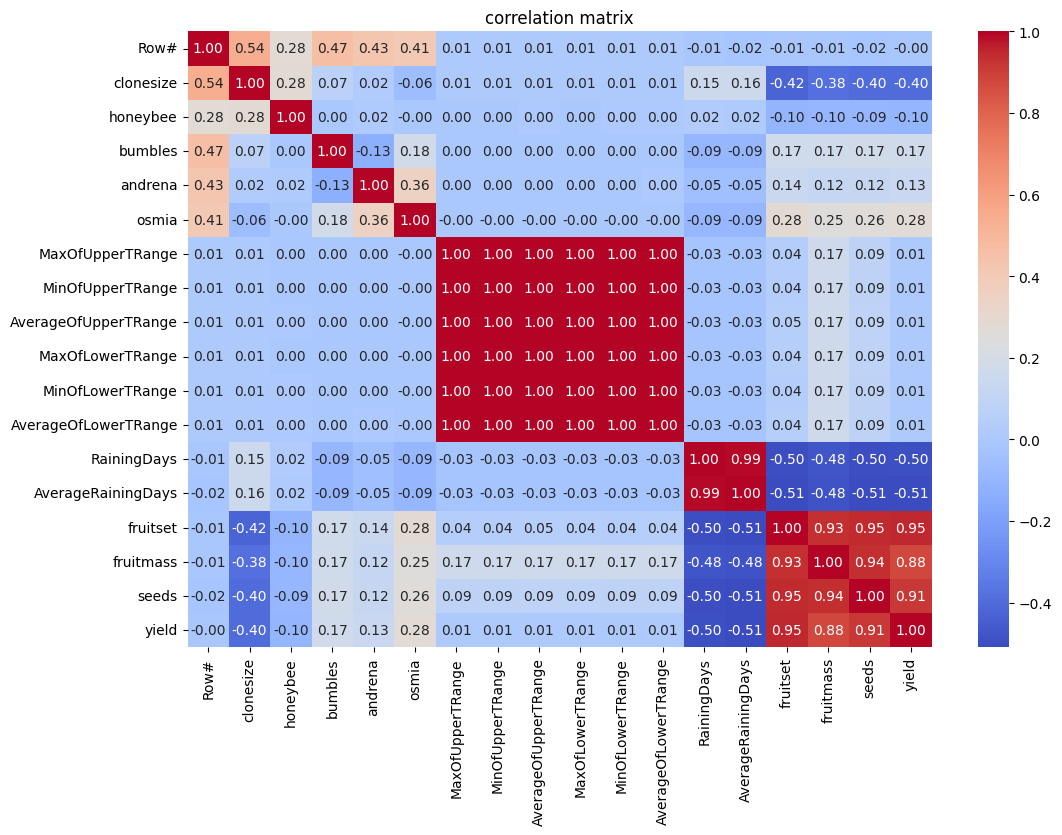

In [90]:
plt.figure(figsize=(12,8))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [91]:
X=df.drop('yield',axis=1)
y=df['yield']

In [93]:
# checking for muilticollinearity

df_data = pd.DataFrame()
df_data["Feature"] = X.columns
df_data["df"] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]

print(df_data)

                 Feature            df
0                   Row#  1.831521e+01
1              clonesize  1.927130e+01
2               honeybee  2.296776e+00
3                bumbles  4.349468e+01
4                andrena  2.001529e+01
5                  osmia  2.482161e+01
6       MaxOfUpperTRange  8.911169e+05
7       MinOfUpperTRange  3.646840e+05
8   AverageOfUpperTRange  9.159397e+04
9       MaxOfLowerTRange  4.372778e+05
10      MinOfLowerTRange  2.082085e+06
11  AverageOfLowerTRange  2.673048e+05
12           RainingDays  2.143062e+02
13    AverageRainingDays  2.969422e+02
14              fruitset  4.747580e+02
15             fruitmass  1.144462e+03
16                 seeds  9.921086e+02


In [ ]:
#df.corr()
#sns.heatmap(df,annot=True)
#plt.show()

In [94]:
columns_to_drop=['MaxOfUpperTRange','AverageOfUpperTRange','seeds','fruitset','bumbles','MaxOfLowerTRange']
data_df=df.drop(columns=columns_to_drop)



In [95]:
data_df

,Row#,clonesize,honeybee,andrena,osmia,MinOfUpperTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitmass,yield
id,,,,,,,,,,,,
0,539.0,25.0,0.50,0.50,0.75,52.0,30.0,50.8,34.0,0.56,0.442789,5830.89362
1,691.0,25.0,0.50,0.38,0.75,52.0,30.0,50.8,24.0,0.39,0.443755,6190.66597
2,775.0,25.0,0.50,0.63,0.63,46.8,27.0,45.8,16.0,0.26,0.399556,3923.90628
3,49.0,25.0,0.25,0.25,0.25,52.0,30.0,50.8,34.0,0.56,0.388819,3680.56025
4,556.0,25.0,0.50,0.63,0.50,57.2,33.0,55.9,34.0,0.56,0.401670,4576.10071
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,714.0,25.0,0.50,0.50,0.63,42.1,24.3,41.2,1.0,0.10,0.427938,6422.92209
14996,726.0,25.0,0.50,0.50,0.75,42.1,24.3,41.2,16.0,0.26,0.459224,6263.80788
14997,145.0,12.5,0.25,0.38,0.38,42.1,24.3,41.2,34.0,0.56,0.417909,6521.29112


In [96]:
data_df.columns

Index(['Row#', 'clonesize', 'honeybee', 'andrena', 'osmia', 'MinOfUpperTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'fruitmass', 'yield'],
      dtype='object')

In [97]:
x = data_df.drop(columns=["yield"])
y=data_df['yield']

In [98]:
x

,Row#,clonesize,honeybee,andrena,osmia,MinOfUpperTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitmass
id,,,,,,,,,,,
0,539.0,25.0,0.50,0.50,0.75,52.0,30.0,50.8,34.0,0.56,0.442789
1,691.0,25.0,0.50,0.38,0.75,52.0,30.0,50.8,24.0,0.39,0.443755
2,775.0,25.0,0.50,0.63,0.63,46.8,27.0,45.8,16.0,0.26,0.399556
3,49.0,25.0,0.25,0.25,0.25,52.0,30.0,50.8,34.0,0.56,0.388819
4,556.0,25.0,0.50,0.63,0.50,57.2,33.0,55.9,34.0,0.56,0.401670
...,...,...,...,...,...,...,...,...,...,...,...
14995,714.0,25.0,0.50,0.50,0.63,42.1,24.3,41.2,1.0,0.10,0.427938
14996,726.0,25.0,0.50,0.50,0.75,42.1,24.3,41.2,16.0,0.26,0.459224
14997,145.0,12.5,0.25,0.38,0.38,42.1,24.3,41.2,34.0,0.56,0.417909


In [13]:
y

0        5830.89362
1        6190.66597
2        3923.90628
3        3680.56025
4        4576.10071
            ...    
14995    6422.92209
14996    6263.80788
14997    6521.29112
14998    4278.76321
14999    5686.12196
Name: yield, Length: 15000, dtype: float64

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
#scale the features
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

model the data

In [101]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)

LinearRegression()

In [102]:
# predicting
y_train_pred=lin_reg.predict(x_train_scaled)
y_test_pred=lin_reg.predict(x_test_scaled)


In [104]:
# evaluation of model
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print(f"mean_squared_error(train):{mse_train}")
print(f" mean_squared_error(test):{mse_test}")
mae_train=mean_absolute_error(y_train,y_train_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
print(f"mean_absolute_error(train):{mae_train}")
print(f"mean_absolute_error(test):{mae_test}")
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
print(f"r2_score(train):{r2_train}")
print(f"r2_score(test):{r2_test}")


mean_squared_error(train):345828.2088072748
 mean_squared_error(test):849287.504529686
mean_absolute_error(train):418.24788763788996
mean_absolute_error(test):425.3879576467188
r2_score(train):0.8133857451902622
r2_score(test):0.5478088278224302


- mse_test is higher than the train_mse implying that the model performs worse on the test data than train data.
- the test mae is higher than the training mae,indicating worse performance on the test data
- the test R2 is slightly lower than the training R2 indicating that the model explains slightly less variance on the test data compared to the trainig data 

In [105]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,426.624933,19.782167,0.388205,0.285111,0.48702,0.589461,82.091027,49.626007,68.588927,59.170160,28.633360,48.523293,18.900725,0.328739,0.499710,0.445391,36.052489,6002.579596
std,215.732093,6.667215,0.390200,0.058730,0.14885,0.146798,9.125708,5.533023,7.627948,6.594665,3.188053,5.379366,11.877598,0.166834,0.077221,0.038281,4.117135,1363.250359
min,0.000000,12.500000,0.000000,0.000000,0.00000,0.000000,69.700000,37.000000,41.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.037218,22.079199,1637.704020
25%,245.000000,12.500000,0.250000,0.250000,0.38000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450822,0.417909,33.228900,5061.720610
50%,466.000000,25.000000,0.500000,0.250000,0.50000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.504761,0.445494,35.972257,6098.113170
75%,599.000000,25.000000,0.500000,0.380000,0.63000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.561962,0.471829,39.096884,7022.189730
max,776.000000,37.500000,18.430000,0.585000,0.75000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,62.000000,37.000000,0.560000,0.820888,0.707222,46.718182,8969.401840


# linearity

In [51]:
df['bumbles'].value_counts()

bumbles
0.250    10875
0.380     4084
0.117       28
0.000        4
0.585        3
0.042        2
0.293        2
0.229        1
0.065        1
Name: count, dtype: int64

In [28]:
data_df.columns

Index(['Row#', 'clonesize', 'honeybee', 'andrena', 'osmia', 'MinOfUpperTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'fruitmass', 'yield'],
      dtype='object')

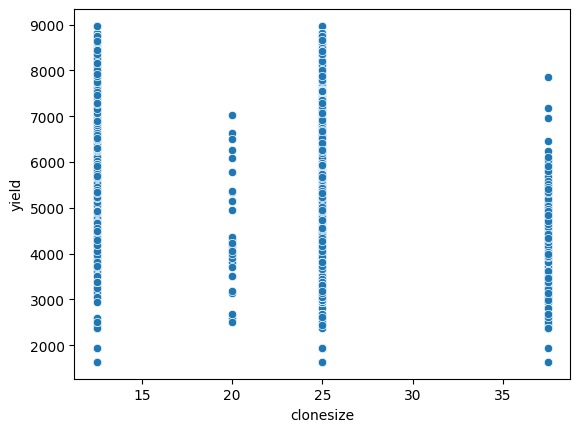

In [25]:
sns.scatterplot(data=data_df,x='clonesize',y='yield')
plt.show()

plt.

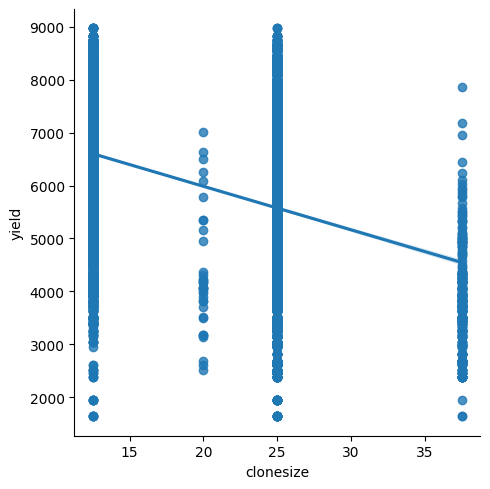

In [26]:
sns.lmplot(data=data_df,x='clonesize',y='yield')
plt.show()

slight linearity indicating that as the clonesize increases the years reduce significantly

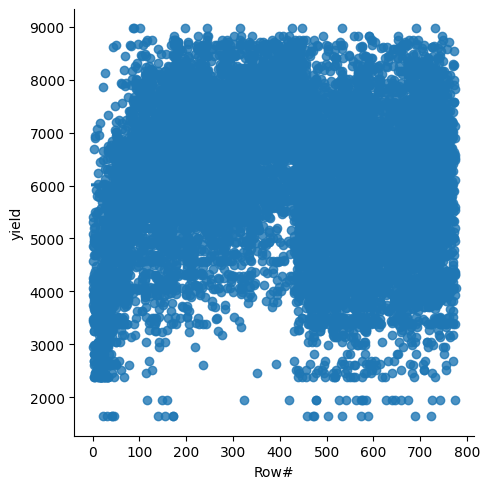

In [27]:
sns.lmplot(data=df,x='Row#',y='yield')
plt.show()

# non linearity in RAW#
no linearity in the two so we address it via log transformation,polynomial transformation

In [28]:
df['log_Row#']=np.log(df['Row#'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


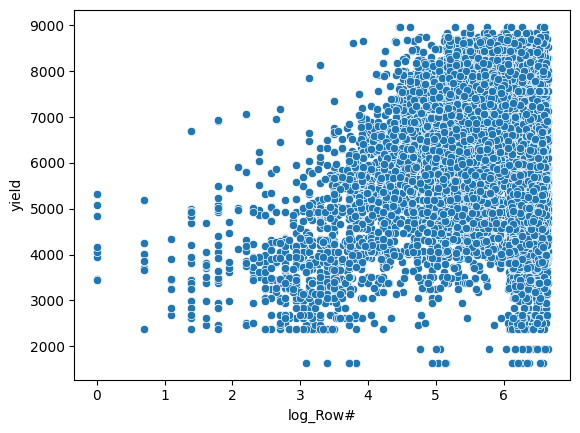

In [29]:
sns.scatterplot(data=df,x='log_Row#',y='yield')
plt.show()

In [56]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

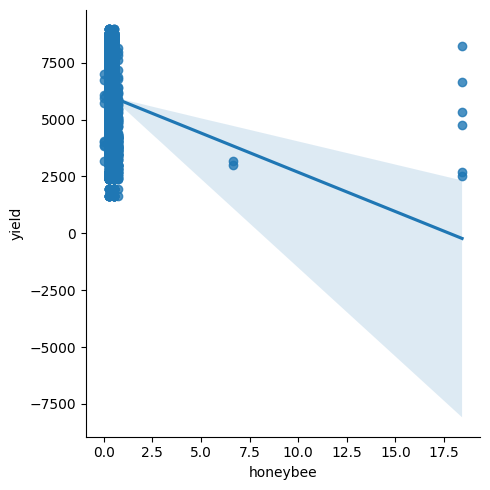

In [30]:
sns.lmplot(data=df,x='honeybee',y='yield')
plt.show()

In [31]:
df['log_honeybee']=np.log(df['honeybee'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


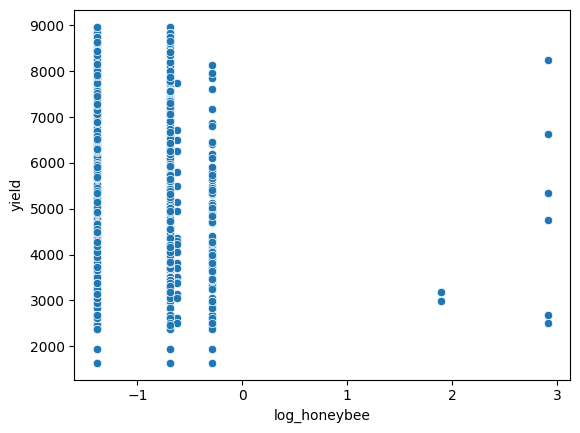

In [32]:
sns.scatterplot(data=df,x='log_honeybee',y='yield')
plt.show()

# honeybee relation to yields

In [58]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

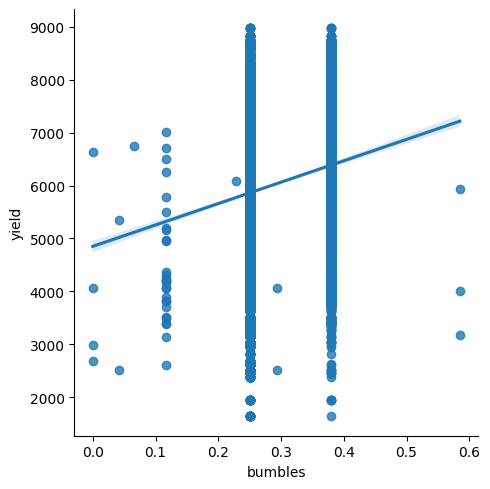

In [33]:
sns.lmplot(data=df,x='bumbles',y='yield')
plt.show()

In [34]:
df['log_bumbles']=np.log(df['bumbles'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


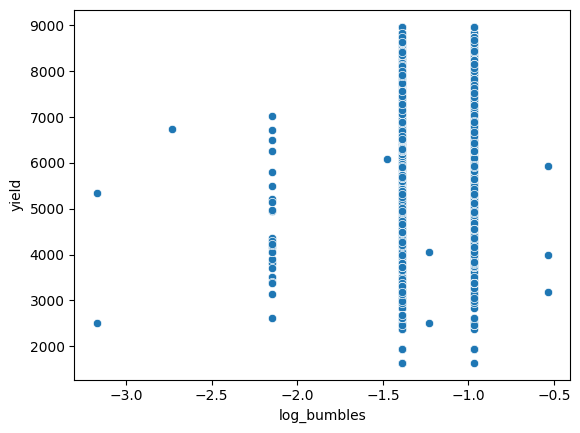

In [35]:
sns.scatterplot(data=df,x='log_bumbles',y='yield')
plt.show()

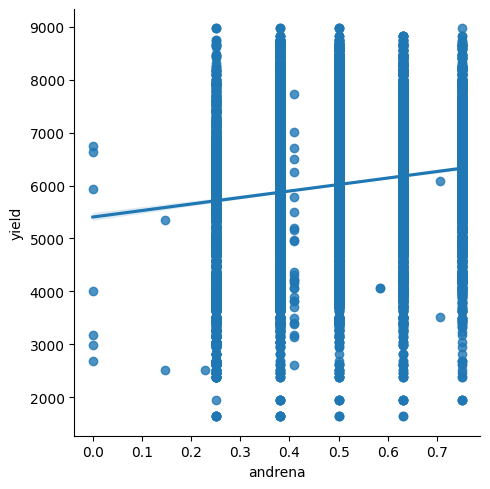

In [36]:
sns.lmplot(data=df,x='andrena',y='yield')
plt.show()

In [38]:
df['log_andrena']=np.log(df['andrena'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


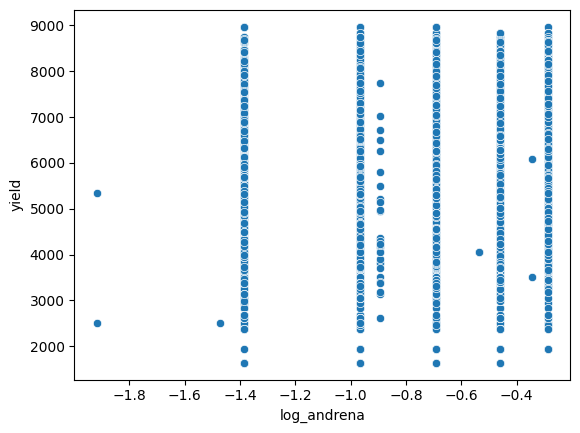

In [39]:
sns.scatterplot(data=df,x='log_andrena',y='yield')
plt.show()

In [61]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

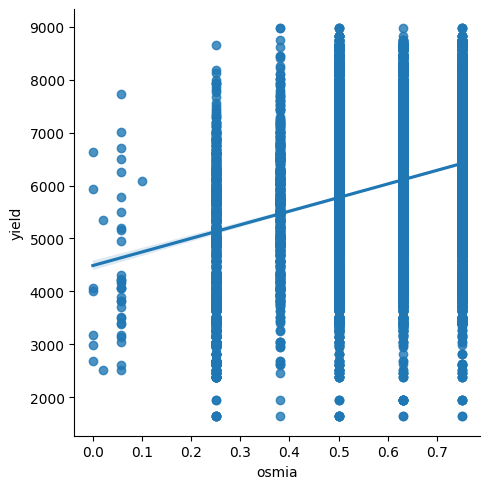

In [41]:
sns.lmplot(data=df,x='osmia',y='yield')
plt.show()

In [42]:
df['log_osmia']=np.log(df['osmia'])

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


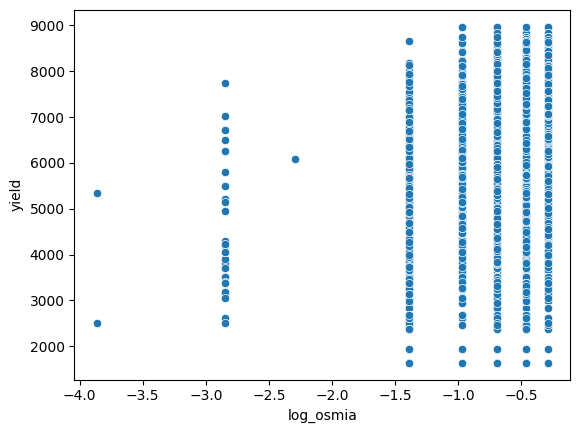

In [43]:
sns.scatterplot(data=df,x='log_osmia',y='yield')
plt.show()

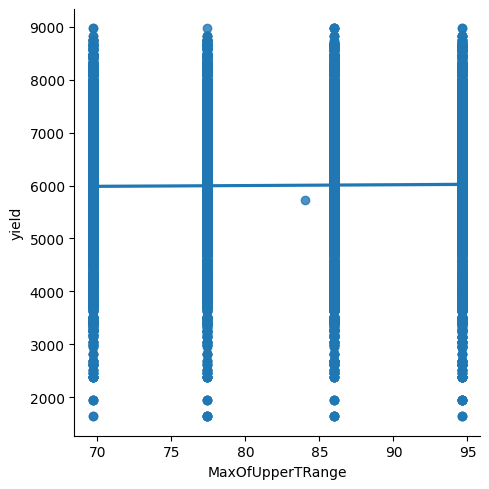

In [44]:
sns.lmplot(data=df,x='MaxOfUpperTRange',y='yield')
plt.show()

In [70]:
data_df.columns

Index(['Row#', 'clonesize', 'honeybee', 'andrena', 'osmia', 'MinOfUpperTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'fruitmass', 'yield'],
      dtype='object')

In [45]:
df['log_maxOfUpperTRange']=np.log(df['MaxOfUpperTRange'])

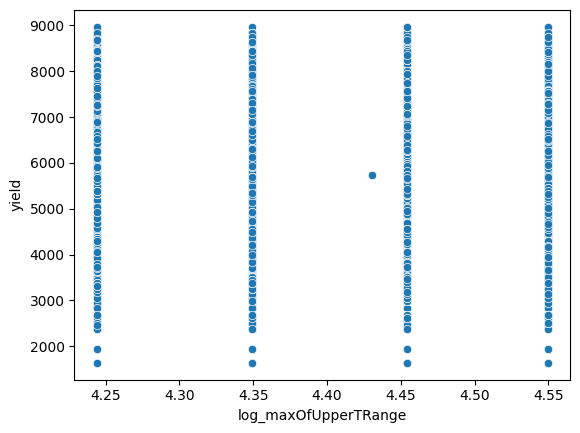

In [46]:
sns.scatterplot(data=df,x='log_maxOfUpperTRange',y='yield')
plt.show()

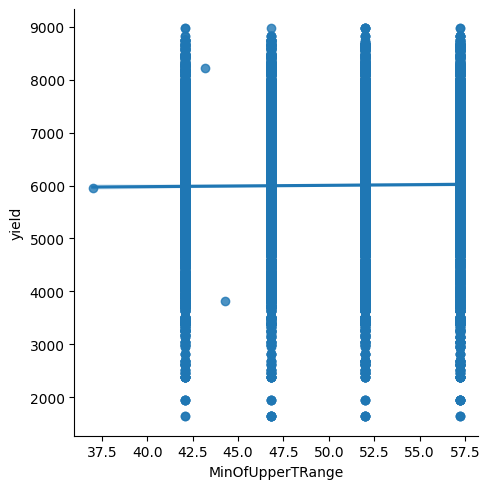

In [47]:
sns.lmplot(data=df,x='MinOfUpperTRange',y='yield')
plt.show()

In [48]:
df['log_minOfUpperRange']=np.log(df['MinOfUpperTRange'])

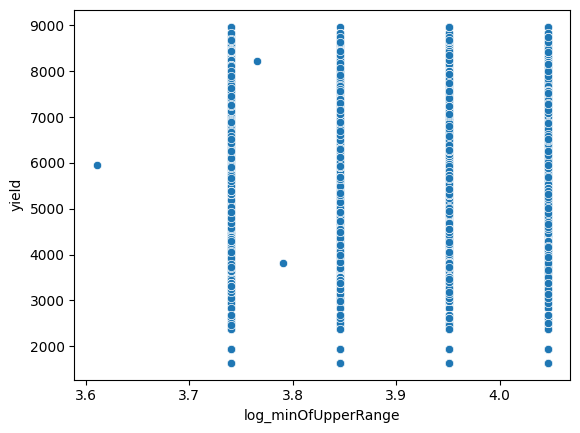

In [49]:
sns.scatterplot(data=df,x='log_minOfUpperRange',y='yield')
plt.show()

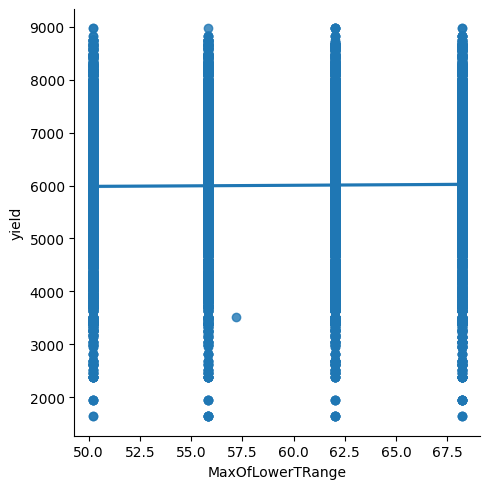

In [50]:
sns.lmplot(data=df,x='MaxOfLowerTRange',y='yield')
plt.show()

In [51]:
df['log_maxOfLowerTRange']=np.log(df['MaxOfLowerTRange'])

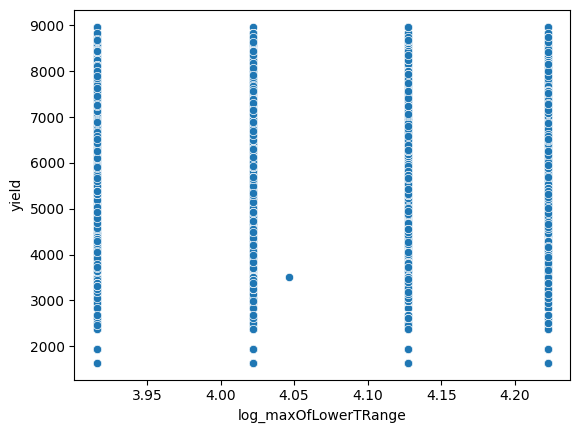

In [52]:
sns.scatterplot(data=df,x='log_maxOfLowerTRange',y='yield')
plt.show()

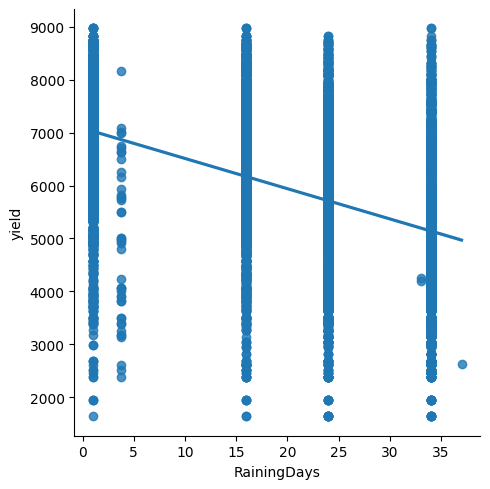

In [53]:
sns.lmplot(data=df,x='RainingDays',y='yield')
plt.show()

In [54]:
df['log_RainingDays']=np.log(df['RainingDays'])

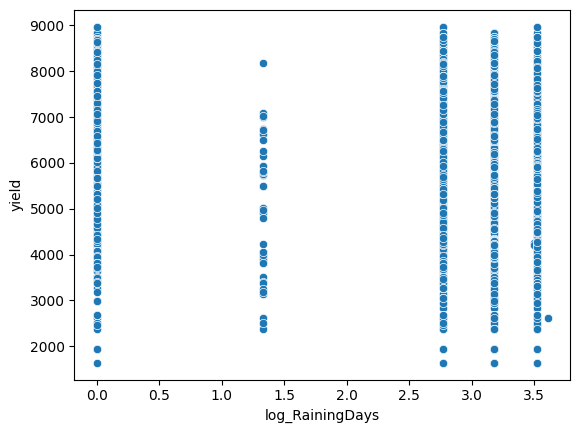

In [55]:
sns.scatterplot(data=df,x='log_RainingDays',y='yield')

plt.show()

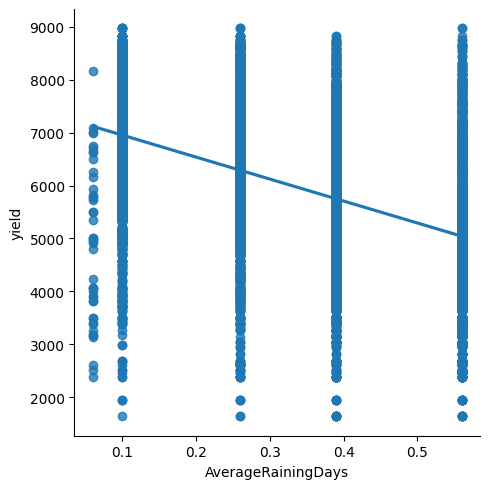

In [67]:
sns.lmplot(data=df,x='AverageRainingDays',y='yield')
plt.show()

In [56]:
df['log_AverageRainingDays']=np.log(df['AverageRainingDays'])

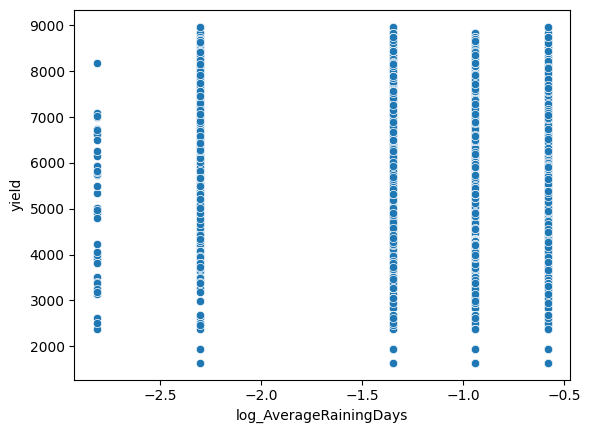

In [57]:
sns.scatterplot(data=df,x='log_AverageRainingDays',y='yield')
plt.show()

In [68]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

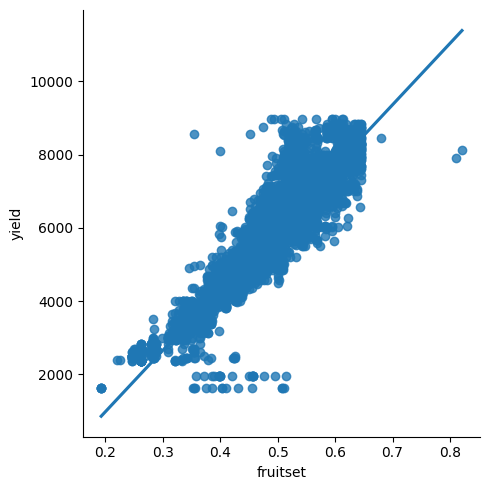

In [69]:
sns.lmplot(data=df,x='fruitset',y='yield')
plt.show()

In [58]:
df['log_fruitset']=np.log(df['fruitset'])

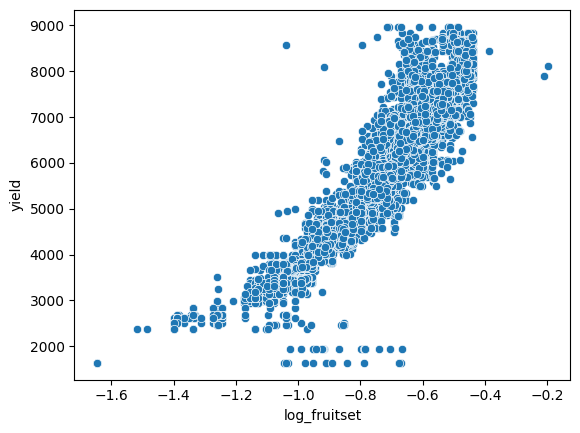

In [59]:
sns.scatterplot(data=df,x='log_fruitset',y='yield')
plt.show()

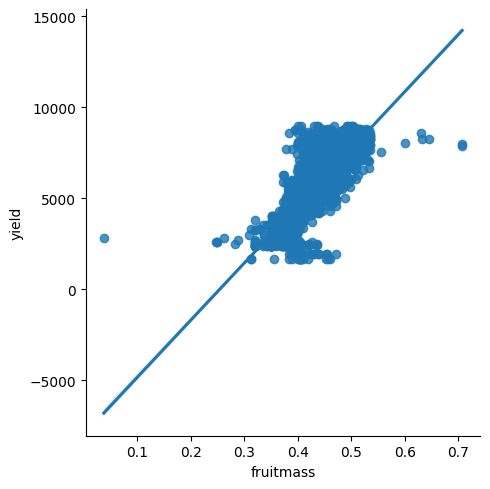

In [60]:
sns.lmplot(data=df,x='fruitmass',y='yield')
plt.show()

In [61]:
df['log_fruitmass']=np.log(df['fruitmass'])

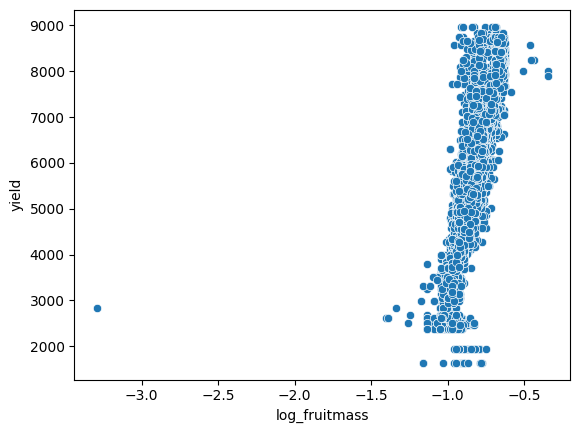

In [62]:
sns.scatterplot(data=df,x='log_fruitmass',y='yield')
plt.show()

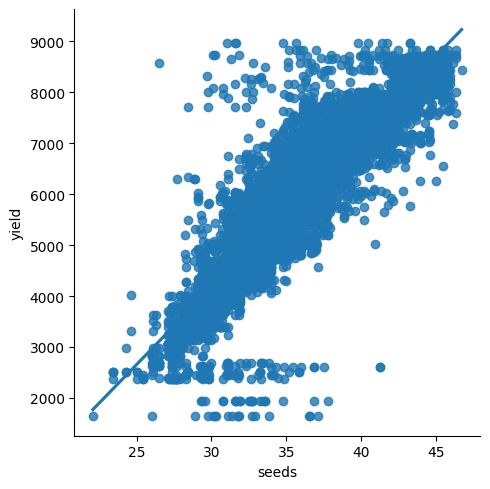

In [63]:
sns.lmplot(data=df,x='seeds',y='yield')
plt.show()

In [64]:
df['log_seeds']=np.log(df['seeds'])

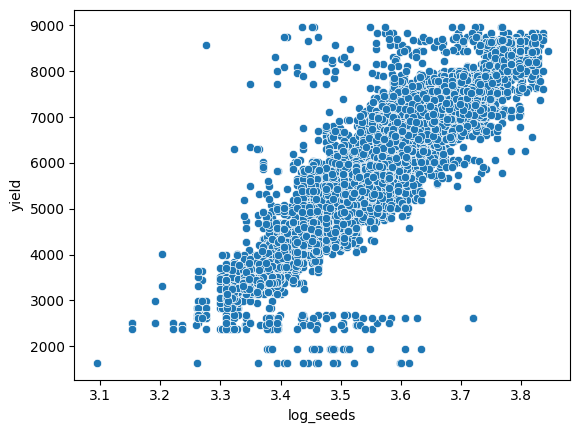

In [65]:
sns.scatterplot(data=df,x='log_seeds',y='yield')
plt.show()

In [66]:
df['sqrt_seeds']=np.sqrt(df['seeds'])
plt.show()

polynomial tranformation

In [106]:
poly=PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.fit_transform(x_test)
lin_reg.fit(x_poly_train,y_train)

LinearRegression()

In [107]:
ytrain_pred=lin_reg.predict(x_poly_train)
ytest_pred=lin_reg.predict(x_poly_test)

In [108]:
mse_train = mean_squared_error(y_train,ytrain_pred)
mse_test = mean_squared_error(y_test,ytest_pred)
print(f"Mean Squared Error (Train) : {mse_train}")
print(f"Mean Squared Error (Test) : {mse_test}")

mae_train = mean_absolute_error(y_train,ytrain_pred)
mae_test = mean_absolute_error(y_test,ytest_pred)
print(f"Mean Absolute Error (Train) : {mae_train}")
print(f"Mean Absolute Error (Test) : {mae_test}")

r2_train = r2_score(y_train,ytrain_pred)
r2_test = r2_score(y_test,ytest_pred)
print(f"R2 (Train) : {r2_train}")
print(f"R2 (Test) : {r2_test}")

Mean Squared Error (Train) : 300368.0617417576
Mean Squared Error (Test) : 39528029722019.12
Mean Absolute Error (Train) : 377.29571833834774
Mean Absolute Error (Test) : 115485.37010221255
R2 (Train) : 0.8379167442589365
R2 (Test) : -21046141.79444502


# computing residuals

In [109]:
residuals=y_test-y_test_pred
residuals

id
11499    133.065565
6475     -38.073936
13167    648.307392
862       62.574864
5970    -493.613664
            ...    
6216    -157.848661
3585    -107.823573
10023    145.996185
14044    478.539361
12965   -273.846932
Name: yield, Length: 3000, dtype: float64

look for independence of residuals

- visualize them with plt

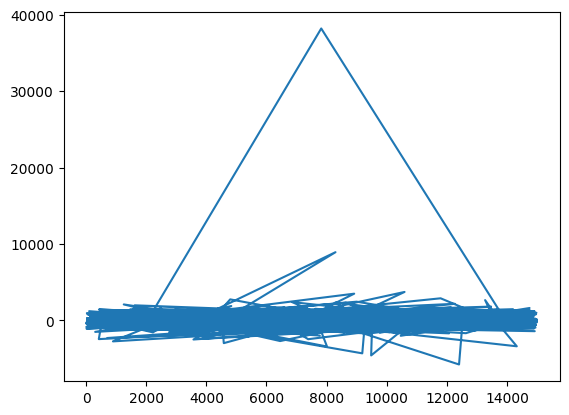

In [110]:
plt.plot(residuals)
plt.show()

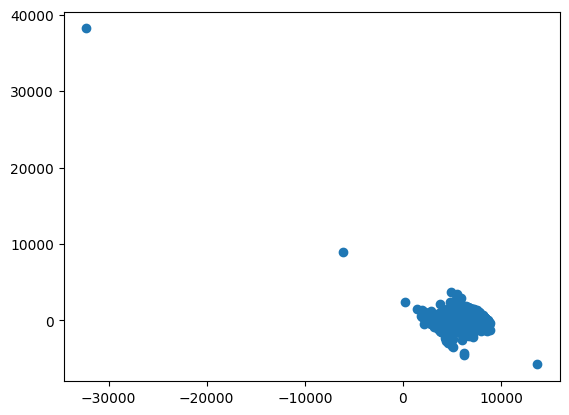

In [111]:
plt.scatter(y_test_pred,residuals)

In [112]:
durbin_watson(residuals)

np.float64(1.974966934682257)

check for autocorrelation that is basically checking on independence

# normality of residuals

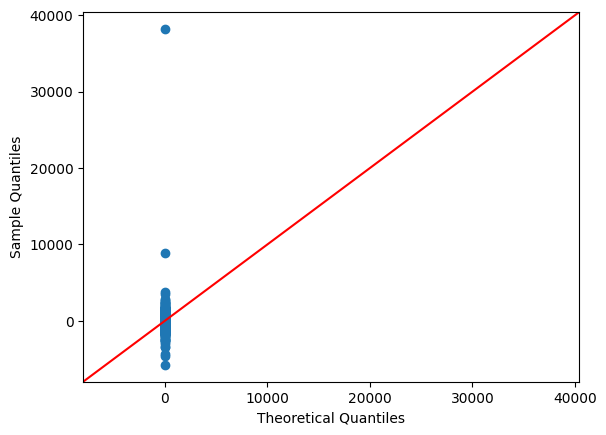

In [113]:
sm.qqplot(residuals,line='45')
plt.show()

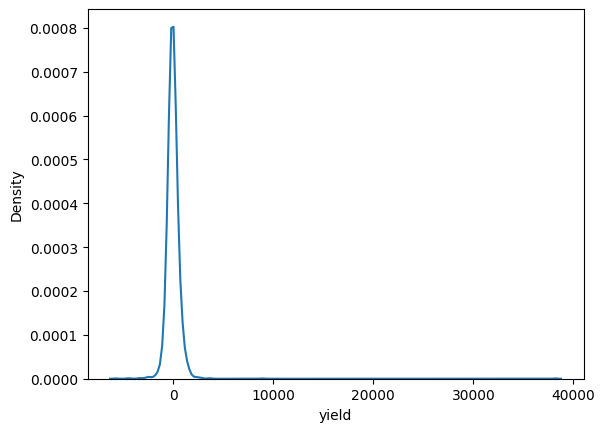

In [114]:
sns.kdeplot(residuals)
plt.show()

In [185]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree)

# Transform the training and testing data
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

lin = LinearRegression()

# Fit the model on the training data
lin.fit(x_poly_train, y_train)

# Predict on the testing and training data
y_train_poly_pred = lin.predict(x_poly_train)
y_test_poly_pred = lin.predict(x_poly_test)

In [186]:
mse_train = mean_squared_error(y_train, y_train_poly_pred)
mse_test = mean_squared_error(y_test, y_test_poly_pred)
print(f"Mean Squared Error (Train) : {mse_train}")
print(f"Mean Squared Error (Test) : {mse_test}")

mae_train = mean_absolute_error(y_train, y_train_poly_pred)
mae_test = mean_absolute_error(y_test, y_test_poly_pred)
print(f"Mean Absolute Error (Train) : {mae_train}")
print(f"Mean Absolute Error (Test) : {mae_test}")

r2_train = r2_score(y_train, y_train_poly_pred)
r2_test = r2_score(y_test, y_test_poly_pred)
print(f"R2 (Train) : {r2_train}")
print(f"R2 (Test) : {r2_test}")

Mean Squared Error (Train) : 300368.0617417576
Mean Squared Error (Test) : 39528029722019.12
Mean Absolute Error (Train) : 377.29571833834774
Mean Absolute Error (Test) : 115485.37010221255
R2 (Train) : 0.8379167442589365
R2 (Test) : -21046141.79444502


In [187]:
from sklearn.linear_model import Ridge

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas:
    degree = 2

    # Define variable for PolynomialFeatures
    poly_ridge = PolynomialFeatures(degree)

    # Transform the x_train
    x_train_ridge_poly = poly_ridge.fit_transform(x_train)

    # Define variable for ridge and pass the lambdas
    ridge_reg = Ridge(alpha=i)

    # Fit the transformed train set
    ridge_reg.fit(x_train_ridge_poly, y_train)

    # Get predictions for the x_train
    y_train_ridge_pred = ridge_reg.predict(x_train_ridge_poly)

    # Get predictions for the x_test
    y_test_ridge_pred = ridge_reg.predict(poly_ridge.fit_transform(x_test))

    # R2 Score
    print("train r2 score: ", r2_score(y_train, y_train_ridge_pred))
    print("test r2 score: ", r2_score(y_test, y_test_ridge_pred))

train r2 score:  0.837916302287717
test r2 score:  -1672883393069303.8
train r2 score:  0.8364930904245964
test r2 score:  -2.6541822682829683
train r2 score:  0.8359188443395255
test r2 score:  0.21446731955276788
train r2 score:  0.8351607728323533
test r2 score:  0.4402836684313628


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.55075e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.54209e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


train r2 score:  0.8344514161537107
test r2 score:  0.4942348462929155
train r2 score:  0.833943589993645
test r2 score:  0.5396118698712897
train r2 score:  0.8335394356631731
test r2 score:  0.5826537635512333
train r2 score:  0.8284432784362747
test r2 score:  0.6056024644071989


In [188]:
from sklearn.linear_model import Lasso

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for i in lambdas:
    degree = 2

    # Define variable for PolynomialFeatures
    lassocoef = PolynomialFeatures(degree)

    # Transform the x_train
    x_train_lasso_poly = lassocoef.fit_transform(x_train)

    # Define variable for ridge and pass the lambdas
    lasso_reg = Lasso(alpha=i)

    # Fit the transformed train set
    lasso_reg.fit(x_train_lasso_poly, y_train)

    # Get predictions for the x_train
    y_train_lasso_pred = lasso_reg.predict(x_train_lasso_poly)

    # Get predictions for the x_test
    y_test_lasso_pred = lasso_reg.predict(lassocoef.fit_transform(x_test))

    # R2 Score
    print("train r2 score: ", r2_score(y_train, y_train_lasso_pred))
    print("test r2 score: ", r2_score(y_test, y_test_lasso_pred))

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+09, tolerance: 2.224e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

train r2 score:  0.831220841761314
test r2 score:  0.7981477255763199


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.8312333893688175
test r2 score:  0.7985485524433211


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.831282647221643
test r2 score:  0.8022053878503865


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.8304837306119137
test r2 score:  0.8095671852408985


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.829536402844242
test r2 score:  0.8079675336732977


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.8264044938119255
test r2 score:  0.8097679825789104


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


train r2 score:  0.7917793377725515
test r2 score:  0.7885214057338066
train r2 score:  0.7280211312756001
test r2 score:  0.7355074856907706


c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+07, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


In [190]:
degree=2
poly = PolynomialFeatures(degree)
xtrain_poly = poly.fit_transform(x_train)

In [191]:
bestmodel = Lasso(alpha=1)
bestmodel.fit(xtrain_poly, y_train)

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+09, tolerance: 2.224e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [193]:
print(x_poly_train.shape)
print(x_poly_test.shape)

(12000, 78)
(3000, 78)


In [194]:
test_data = pd.read_csv(r"C:\Users\GASTO\Downloads\Compressed\test.csv\test.csv")

In [195]:
test_data.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,758.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.551264,0.479011,39.337772
1,15001,12.0,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.387861,0.395894,30.057704
2,15002,97.0,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.496618,0.444147,35.557537
3,15003,585.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.483873,0.445494,35.118739
4,15004,295.0,12.5,0.25,0.25,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.561190,0.477182,40.641638


In [196]:
test_data.columns

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

In [241]:
columns_to_drop = [
    "bumbles",
    "MaxOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "fruitset",
    "seeds",
]

In [ ]:
test_data.drop(columns=columns_to_drop, inplace=True)

In [243]:
test_data.shape

(10000, 11)

In [ ]:
test_data=test_data.set_index('id')

In [232]:
test_data

,Row#,clonesize,honeybee,andrena,osmia,MinOfUpperTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitmass
id,,,,,,,,,,,
15000,758.0,25.0,0.50,0.63,0.50,57.2,33.0,55.9,34.0,0.56,0.479011
15001,12.0,37.5,0.75,0.25,0.25,46.8,27.0,45.8,24.0,0.39,0.395894
15002,97.0,12.5,0.25,0.25,0.38,52.0,30.0,50.8,24.0,0.39,0.444147
15003,585.0,25.0,0.50,0.63,0.75,57.2,33.0,55.9,24.0,0.39,0.445494
15004,295.0,12.5,0.25,0.63,0.75,42.1,24.3,41.2,34.0,0.56,0.477182
...,...,...,...,...,...,...,...,...,...,...,...
24995,731.0,25.0,0.50,0.50,0.75,46.8,27.0,45.8,24.0,0.39,0.442557
24996,749.0,25.0,0.50,0.50,0.75,57.2,33.0,55.9,16.0,0.26,0.482875
24997,134.0,12.5,0.25,0.38,0.63,57.2,33.0,55.9,1.0,0.10,0.457829


In [219]:
degree=2
poly=PolynomialFeatures(degree)
x_poly_train=poly.fit_transform(test_data)

In [220]:
y_pred=bestmodel.predict(x_poly_test)

In [221]:
y_pred

array([7338.03437891, 6998.6404897 , 6221.78529457, ..., 8166.84212354,
       2836.23470911, 4654.15592351])

In [246]:
len(y_pred)

3000

In [245]:
test_id

0       15000
1       15001
2       15002
3       15003
4       15004
        ...  
9995    24995
9996    24996
9997    24997
9998    24998
9999    24999
Name: id, Length: 10000, dtype: int64

In [247]:
len('test_id')

7

In [236]:
submission_df = pd.DataFrame()

In [237]:
submission_df.head()

""


In [252]:
submission_df['id']=test_id
submission_df["yield"] = y_pred

In [253]:
submission_df.set_index('id')

,yield
id,
15000,7338.034379
15001,6998.640490
15002,6221.785295
15003,2503.431424
15004,6490.838262
...,...
17995,5665.490910
17996,6245.266118
17997,8166.842124


In [254]:
submission_df.to_csv('submission.csv',index=False)